1BM22CS158 Lab 5/6:

Build KNN Classification model for a given dataset

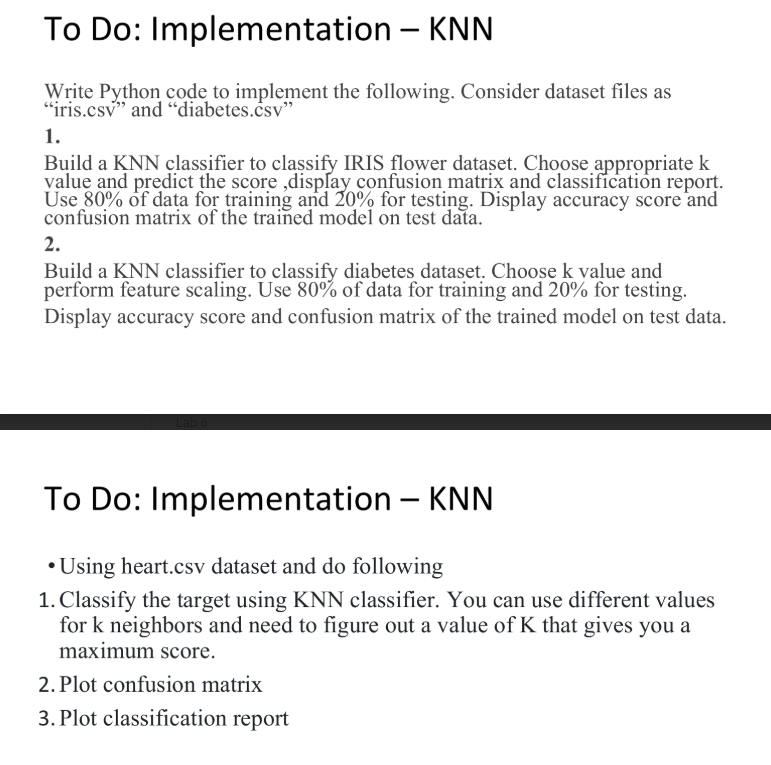

To write in Observation Book

For Iris dataset

How to choose the k value? Demonstrate using accuracy rate and error
rate.

For Diabetes data set

What is the purpose of feature scaling?How to perform it?

In [ ]:
# Mounting Google Drive if needed
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np


##Step 2: IRIS Dataset - KNN Classifier

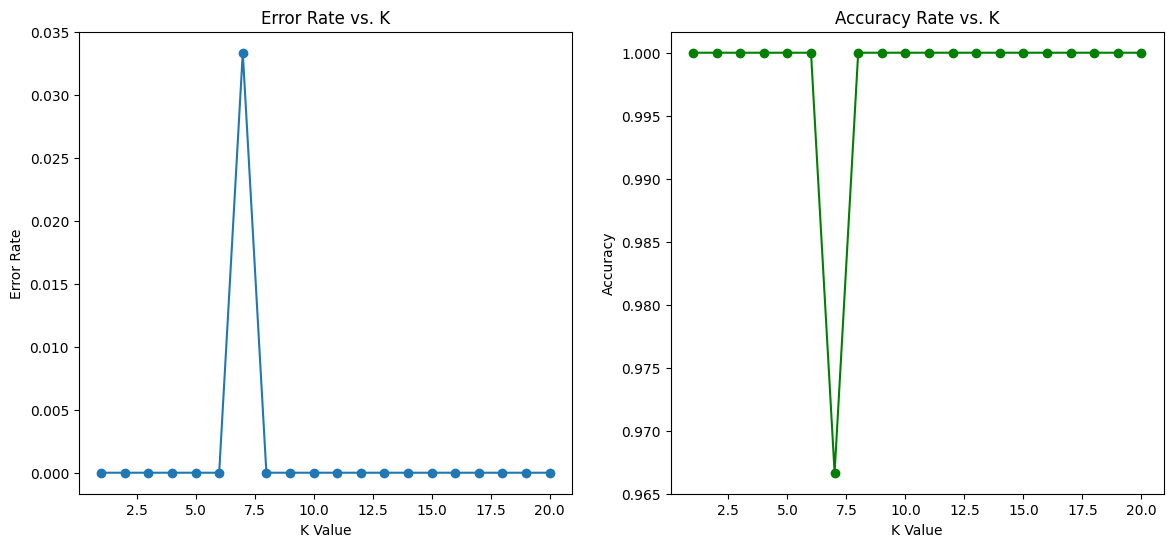

Best K: 1
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



# Load iris dataset
iris_df = pd.read_csv("/content/drive/MyDrive/MLlab dataset/iris (1).csv")  # change path

# Features and labels
X = iris_df.drop(columns=['species'])
y = iris_df['species']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different k values
error_rate = []
accuracy_rate = []
k_range = range(1, 21)

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    error_rate.append(np.mean(preds != y_test))
    accuracy_rate.append(accuracy_score(y_test, preds))

# Plot error rate and accuracy
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(k_range, error_rate, marker='o')
plt.title("Error Rate vs. K")
plt.xlabel("K Value")
plt.ylabel("Error Rate")

plt.subplot(1,2,2)
plt.plot(k_range, accuracy_rate, marker='o', color='green')
plt.title("Accuracy Rate vs. K")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

# Final Model with best k
best_k = accuracy_rate.index(max(accuracy_rate)) + 1
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print("Best K:", best_k)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


##Diabetes Dataset - KNN with Feature Scaling

In [ ]:
# Load dataset
diabetes_df = pd.read_csv('/content/drive/MyDrive/MLlab dataset/diabetes.csv')  # change path

X = diabetes_df.drop(columns=['Outcome'])
y = diabetes_df['Outcome']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Try different k values
accuracy_scores = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Best K
best_k = accuracy_scores.index(max(accuracy_scores)) + 1

# Final model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print("Best K:", best_k)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


Best K: 18
Accuracy: 0.7662337662337663
Confusion Matrix:
 [[89 10]
 [26 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83        99
           1       0.74      0.53      0.62        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.76       154



##Heart Dataset - KNN Classification

Best K: 6
Accuracy: 0.9344262295081968
Confusion Matrix:
 [[28  1]
 [ 3 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



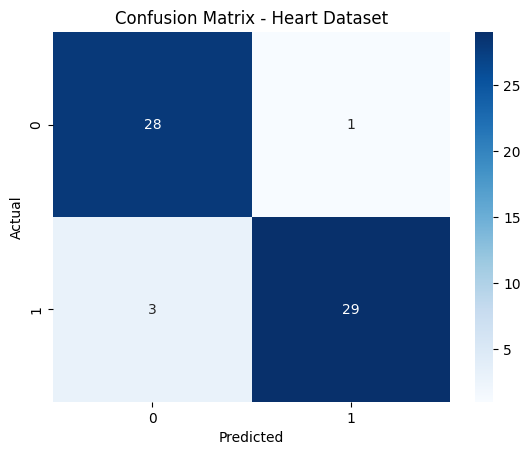

In [ ]:
# Load dataset
heart_df = pd.read_csv('/content/drive/MyDrive/MLlab dataset/heart.csv')  # change path

X = heart_df.drop(columns=['target'])
y = heart_df['target']

# Scaling
X_scaled = StandardScaler().fit_transform(X)

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Test different k values
accuracy_scores = []
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

best_k = accuracy_scores.index(max(accuracy_scores)) + 1

# Final model
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Metrics and plots
print("Best K:", best_k)
print("Accuracy:", accuracy_score(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - Heart Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Theoretical Questions – To Write in Observation Book
🔹 For Iris Dataset
Q: How to choose the k value?

A: To choose the best k value, we plot the error rate and accuracy rate for different values of k (1 to 20). The value of k that gives the highest accuracy (or lowest error rate) on the test set is selected as optimal.

🔹 For Diabetes Dataset
Q: What is the purpose of feature scaling? How to perform it?

A: Feature scaling ensures that all features contribute equally to the distance computation in KNN. Without scaling, features with larger ranges dominate. It's performed using StandardScaler in sklearn, which transforms features to have 0 mean and unit variance.

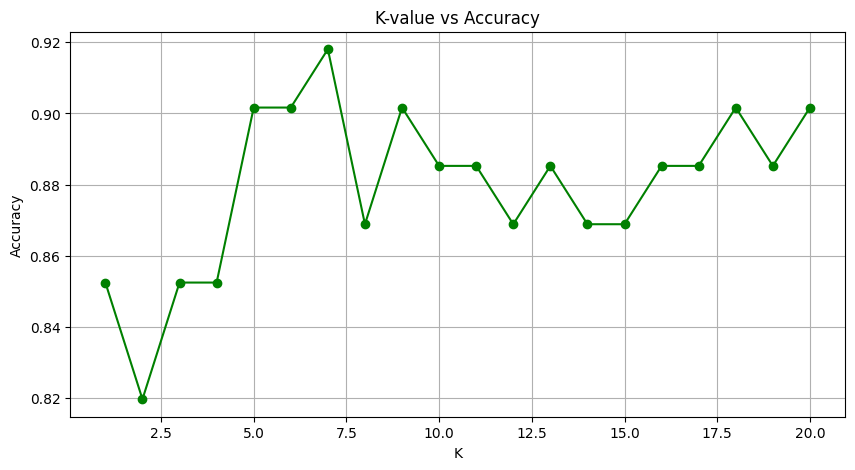

Best K: 7 with Accuracy: 0.9180


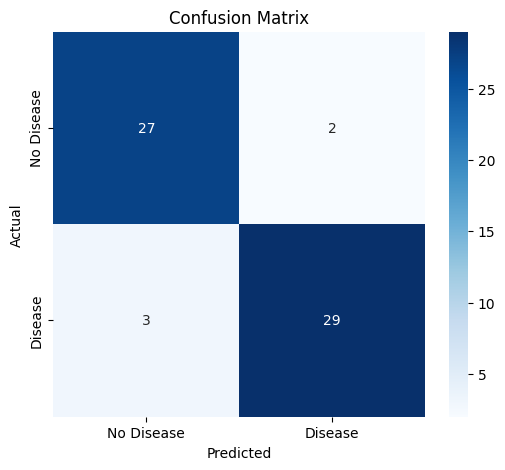

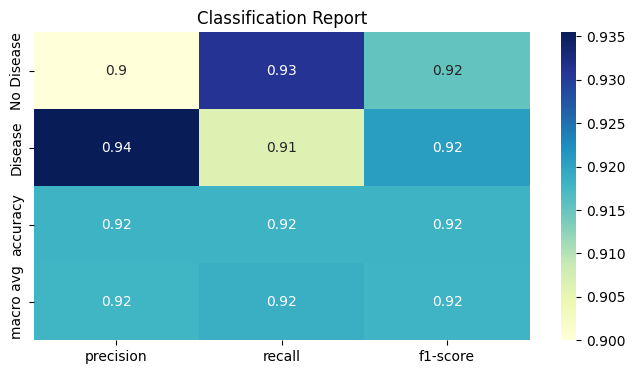

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
heart = pd.read_csv('/content/drive/MyDrive/MLlab dataset/heart.csv')

# Features and target
X = heart.drop(columns=['target'])
y = heart['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Try different values of k and choose the best one
accuracy_scores = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

# Plot accuracy vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', color='green')
plt.title('K-value vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Get best K
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k} with Accuracy: {max(accuracy_scores):.4f}")

# Train final model with best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'], output_dict=True)
df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(8, 4))
sns.heatmap(df_report.iloc[:-1, :-1], annot=True, cmap="YlGnBu")
plt.title("Classification Report")
plt.show()


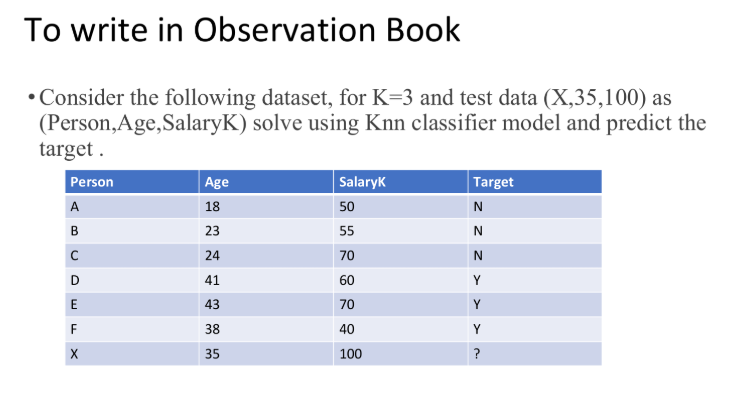